In [1]:
# Load first or there will be problems!
from sympy import *
import sympy

from math import atan2
import numpy as np
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt

In [2]:
def curvogram(xbins, hist_x, hist_y, xsymbolic, f, fprime, ax, Xlim=[], Ylim=[], scaleheight=1., density_scale=1.):
    # set a buffer on default xlimits:
    if Xlim==[]:
        Xlim = [np.min(xbins) - (np.max(xbins)-np.min(xbins))*0.25, np.max(xbins) + (np.max(xbins)-np.min(xbins))*0.25]
    
    # Curve x and y values
    xrange = np.linspace(Xlim[0], Xlim[1], 100)
    y = np.asarray([float(f.subs({xsymbolic : xval})) for xval in xrange])
    
    if Ylim==[]:
        Ylim = [np.min(y)-0.01, 2.1*(np.max(y)-np.min(y)) + np.min(y)+0.01] # default is to make it twice the span (leave room for the curvogram)
        
    if np.diff(Ylim)[0]==0:
        ylimits = [Ylim[0],Ylim[1]+1]
    
    # Plot gridlines
    ycountmax = np.max(y)*scaleheight
    addGridlines(xbins, ycountmax, xsymbolic, f, fprime, Xlim, Ylim, ax)
    
    # Plot histogram
    addRects(xbins, hist_y, ax, xsymbolic, f, fprime, scaleheight, density_scale, Xlim, Ylim)
    
    # Plot user function curve
    ax.plot(xrange, y, lw=3, color="black", zorder=4)
    
    ax.set_ylim(Ylim)
    ax.set_xlim(Xlim)
    
def westCoordTransform(point, scale, xsymbolic, f, fprime):
    p = point[0]
    q = point[1]
    
    theta1 = atan2( float(fprime.subs({xsymbolic : p})) , 1/scale )
    
    return( [ float(p-scale*q*sin(theta1)) , float(float(f.subs({xsymbolic : p}))+q*cos(theta1)) ] )

def addGridlines(xbins, ycountmax, xsymbolic, f, fprime, Xlim, Ylim, ax):
    scale = np.diff(Xlim)[0]/np.diff(Ylim)[0]
    
    # d:= max distance of any line w/ axis scale limits:
    # d is defined as y for the west coord transform
    xbins = np.asarray([val for i, val in enumerate(xbins) if i%2==0])
    
    for x in xbins:
        P = westCoordTransform( [x , ycountmax] , scale , xsymbolic, f, fprime )
        ax.plot([x, P[0]], [float(f.subs({xsymbolic: x})), P[1]], lw = 1, color="darkgrey", zorder=1)
        
    
    for ygridpos in np.linspace(0, ycountmax, xbins.shape[0]):
        xgrid = []
        ygrid = []
        for xgridpos in np.linspace(np.min(xbins), np.max(xbins), 100):
            P = westCoordTransform( [xgridpos , ygridpos] , scale , xsymbolic, f, fprime )
            ygrid.append(P[1])
            xgrid.append(P[0])
            
        ax.plot(xgrid, ygrid, lw = 1, color="darkgrey", zorder=0)
        
def addRects(hist_x, hist_y, ax, xsymbolic, f, fprime, scaleheight, density_scale, Xlim, Ylim):
    scale = np.diff(Xlim)[0]/np.diff(Ylim)[0]
    
    patches = []
    for i, y_val in enumerate(hist_y):
        xstart, xend = [hist_x[i]-np.diff(hist_x)[0]/2., hist_x[i]+np.diff(hist_x)[0]/2.]
        
        x1, y1 = [xstart, float(f.subs({xsymbolic:xstart}))] # Bottom left
        x2, y2 = [xend, float(f.subs({xsymbolic:xend}))] # Bottom right

        P1 = westCoordTransform( [x1 , y_val*density_scale] , scale , xsymbolic, f, fprime ) # x3, y3 of top left
        P2 = westCoordTransform( [x2 , y_val*density_scale] , scale , xsymbolic, f, fprime ) # x4, y4 of top right
        px1, py1 = P1
        px2, py2 = P2
        
        pts = np.zeros((4,2))
        pts[0,0] = x1
        pts[0,1] = y1 # bottom left
        pts[1,0] = x2
        pts[1,1] = y2 # bottom right
        pts[2,0] = P2[0] # top right
        pts[2,1] = P2[1]
        pts[3,0] = P1[0] # top left
        pts[3,1] = P1[1]

        poly = Polygon(pts, closed=True)
        patches.append(poly)
    
    p = PatchCollection(patches, alpha=1., zorder=3)
    ax.add_collection(p)

In [3]:
xrange = np.linspace(0, 3, 20)
numbers = np.random.normal(loc=1.5, scale=0.3, size=1000)
yvalues, bin_edges = np.histogram(numbers, bins=xrange, density=True)

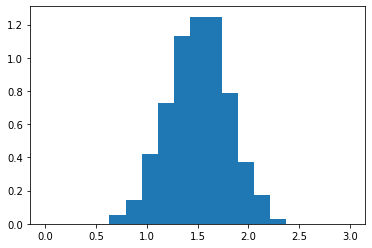

In [4]:
plt.hist(numbers, bins=xrange, density=True)
plt.show()

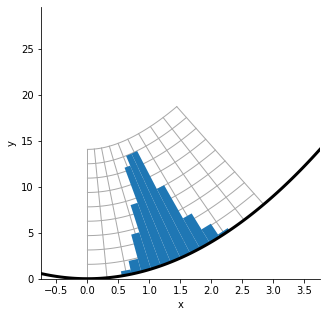

In [5]:
x = Symbol('x')
f = x**2
fprime = f.diff(x)

fig, ax = plt.subplots(1,1, figsize=(5,5))

curvogram(xrange, bin_edges, yvalues, x, f, fprime, ax, scaleheight=1., density_scale=10.)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

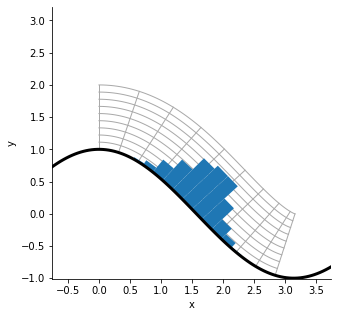

In [6]:
x = Symbol('x')
f = sympy.cos(x)
fprime = f.diff(x)

fig, ax = plt.subplots(1,1, figsize=(5,5))

curvogram(xrange, bin_edges, yvalues, x, f, fprime, ax, scaleheight=1., density_scale=0.6)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

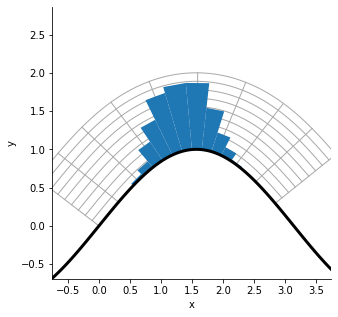

In [7]:
x = Symbol('x')
f = sympy.sin(x)
fprime = f.diff(x)

fig, ax = plt.subplots(1,1, figsize=(5,5))

curvogram(xrange, bin_edges, yvalues, x, f, fprime, ax, scaleheight=1., density_scale=0.7)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel("x")
plt.ylabel("y")
plt.show()